In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import *
from src.visualization import *
from src.evaluation import *
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
EPOCHS = 100
BATCH_SIZE = 50
LOOKBACK = 96
HORIZON = 48
HIDDEN_LAYER_SIZE = 100
LOSS = smape

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

# Train The Model

In [3]:
model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)

Tensor("dense_1/BiasAdd:0", shape=(50, 48), dtype=float64)
Epoch 1/100
129/129 [==============================] - 8s 66ms/step - loss: 85.6159 - val_loss: 72.7711
Epoch 2/100
129/129 [==============================] - 8s 62ms/step - loss: 63.1057 - val_loss: 62.5232
Epoch 3/100
129/129 [==============================] - 8s 61ms/step - loss: 58.4216 - val_loss: 57.6518
Epoch 4/100
129/129 [==============================] - 8s 61ms/step - loss: 56.6910 - val_loss: 66.5607
Epoch 5/100
129/129 [==============================] - 8s 61ms/step - loss: 56.0124 - val_loss: 54.9540
Epoch 6/100
129/129 [==============================] - 8s 62ms/step - loss: 55.2934 - val_loss: 57.7808
Epoch 7/100
129/129 [==============================] - 8s 61ms/step - loss: 54.9485 - val_loss: 54.4121
Epoch 8/100
129/129 [==============================] - 8s 63ms/step - loss: 54.2390 - val_loss: 52.7804
Epoch 9/100
129/129 [==============================] - 8s 61ms/step - loss: 53.9864 - val_loss: 54.1040
Epoch

129/129 [==============================] - 8s 59ms/step - loss: 45.2799 - val_loss: 48.5265
Epoch 79/100
129/129 [==============================] - 7s 58ms/step - loss: 45.4420 - val_loss: 50.8426
Epoch 80/100
129/129 [==============================] - 7s 57ms/step - loss: 45.2823 - val_loss: 45.4057
Epoch 81/100
129/129 [==============================] - 7s 57ms/step - loss: 45.1070 - val_loss: 45.7612
Epoch 82/100
129/129 [==============================] - 8s 58ms/step - loss: 45.1715 - val_loss: 46.3162
Epoch 83/100
129/129 [==============================] - 8s 59ms/step - loss: 45.1033 - val_loss: 46.1984
Epoch 84/100
129/129 [==============================] - 8s 58ms/step - loss: 45.1083 - val_loss: 46.7657
Epoch 85/100
129/129 [==============================] - 7s 58ms/step - loss: 44.9138 - val_loss: 46.9966
Epoch 86/100
129/129 [==============================] - 8s 59ms/step - loss: 44.8246 - val_loss: 45.3403
Epoch 87/100
129/129 [==============================] - 8s 59ms/step

# Save The Model

In [8]:
model.save('../models')

Saved model files to disk under../models/11


# Get Best And Worst Predictions

[[-1.01618982e+00 -1.01025126e+00 -1.04500936e+00 ... -6.34012132e-01
  -7.22857923e-01 -8.15612870e-01]
 [-6.01526407e-01 -7.80871523e-01 -9.28460018e-01 ...  5.82299028e-04
  -2.74099585e-01 -4.66171431e-01]
 [-9.10707726e-01 -1.03342775e+00 -1.02609797e+00 ... -5.72102219e-01
  -6.86242749e-01 -7.93350889e-01]
 ...
 [-9.46589962e-01 -1.00453308e+00 -1.05329215e+00 ... -3.81146559e-01
  -6.24081158e-01 -6.92263821e-01]
 [-1.23324016e+00 -1.23115543e+00 -1.30646563e+00 ... -6.53789177e-01
  -8.18527871e-01 -9.31115360e-01]
 [-3.41450776e-01 -7.25302140e-01 -9.30727036e-01 ...  2.80937978e-01
   4.24113999e-02 -1.54225443e-01]]
[[-0.95164189 -1.05585656 -1.09394845 ... -0.38963803 -0.6698771
  -0.72777708]
 [-1.14073929 -1.25576083 -1.28077488 ... -0.46946435 -0.76176458
  -0.97087385]
 [-0.87349916 -1.04420259 -1.04861398 ... -0.35493805 -0.54449001
  -0.6733475 ]
 ...
 [-0.88526659 -0.94321075 -0.94338717 ... -0.51456174 -0.64122122
  -0.71115233]
 [-0.79878402 -0.89698273 -0.9358712

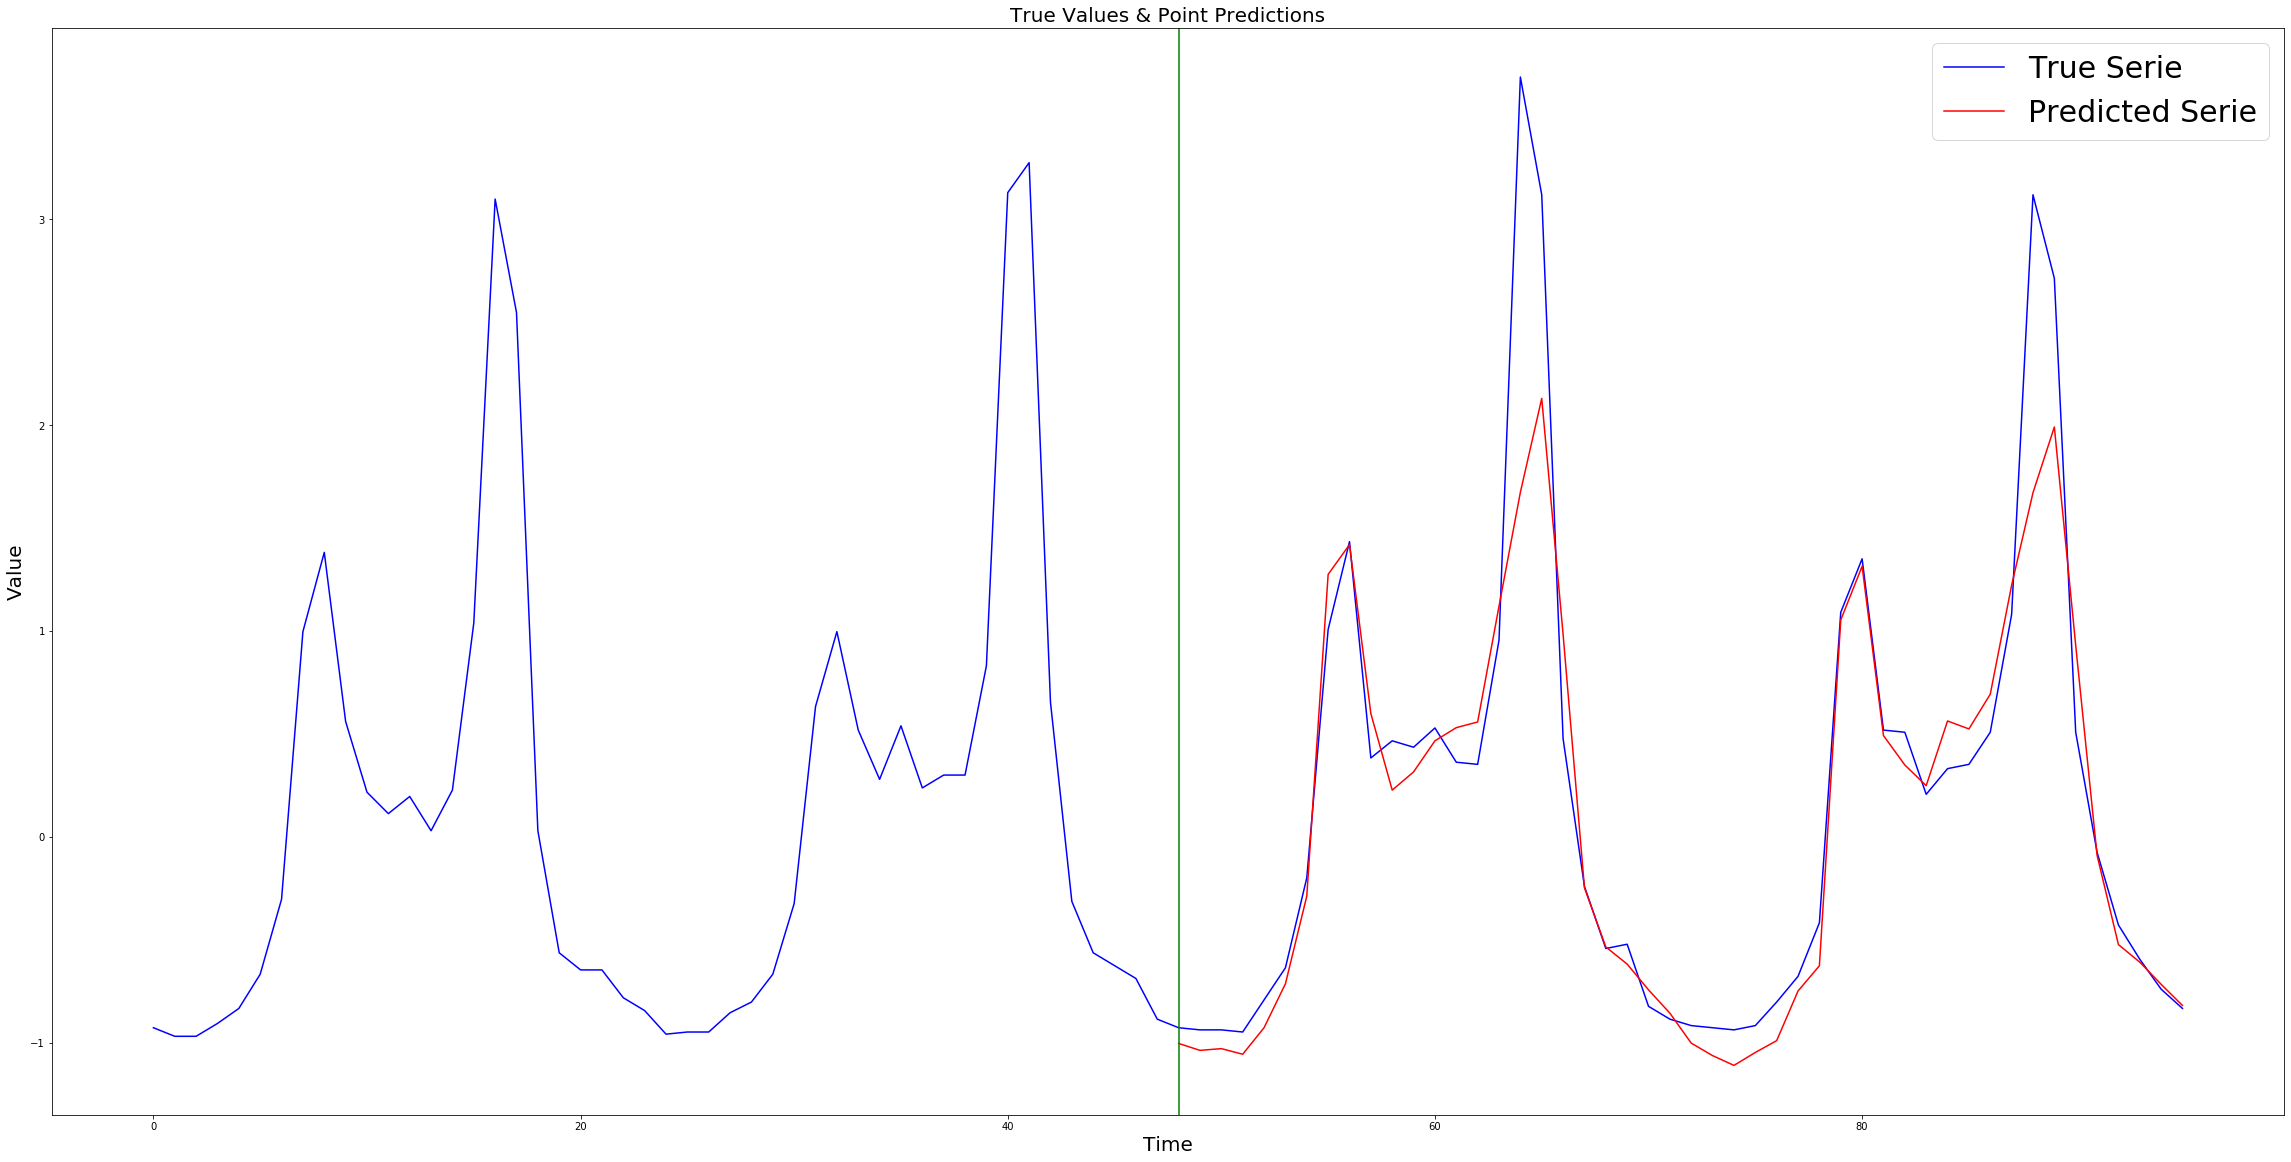

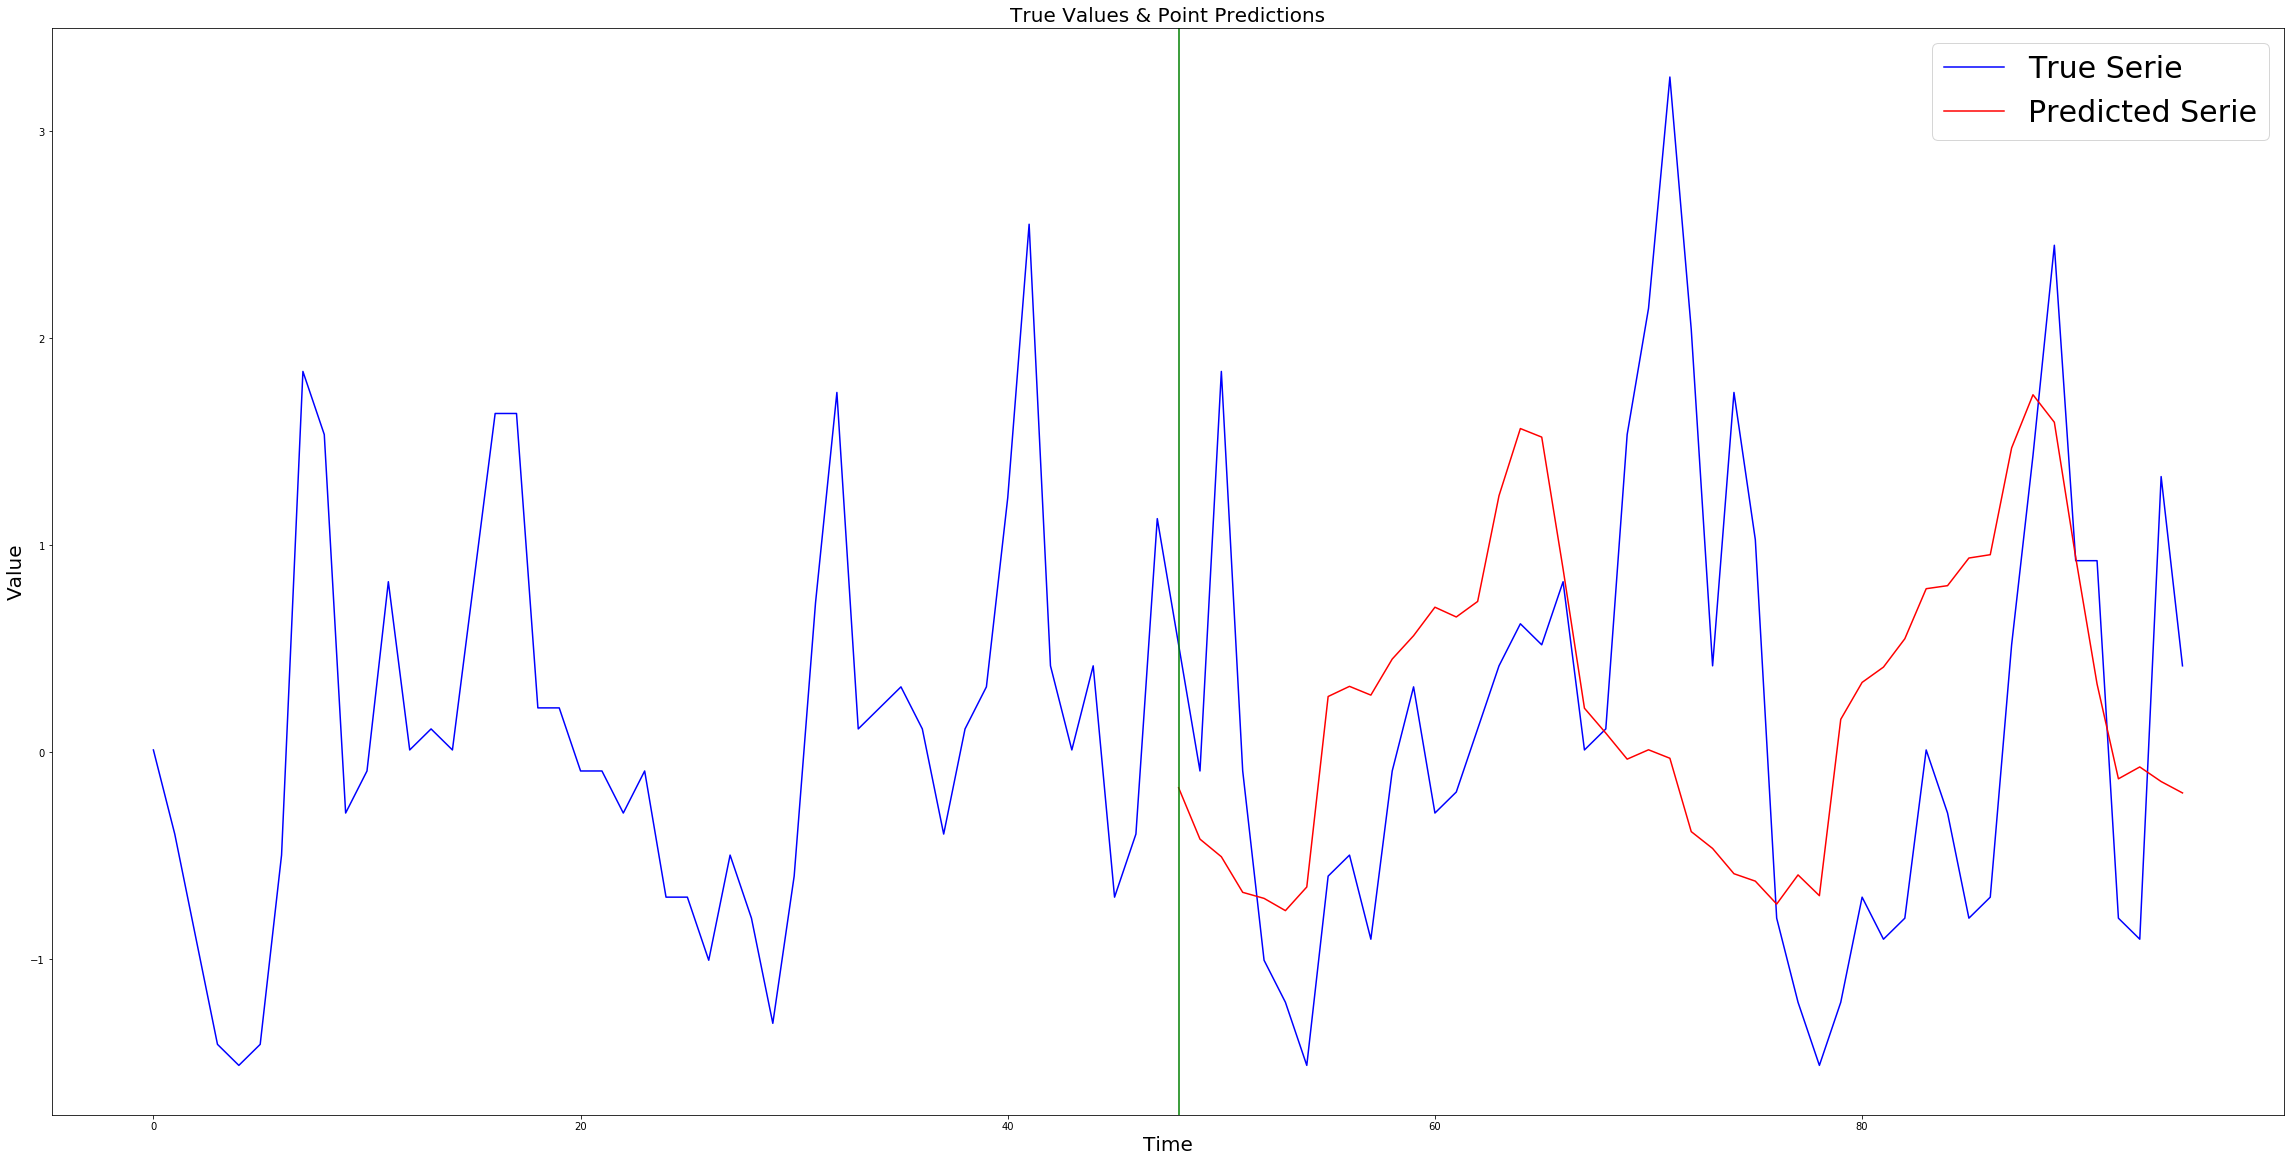

In [24]:
x, y, prediction, error =  sort_by_prediction_error(model, validate_x, validate_y, smape)

print(error[0])
plot_serie_and_prediction(x, y, pred, serie_indx=0)

print(error[x.shape[0]-1])
plot_serie_and_prediction(x, y, pred, serie_indx= x.shape[0]-1)

# PLot Specific Serie From A Batch

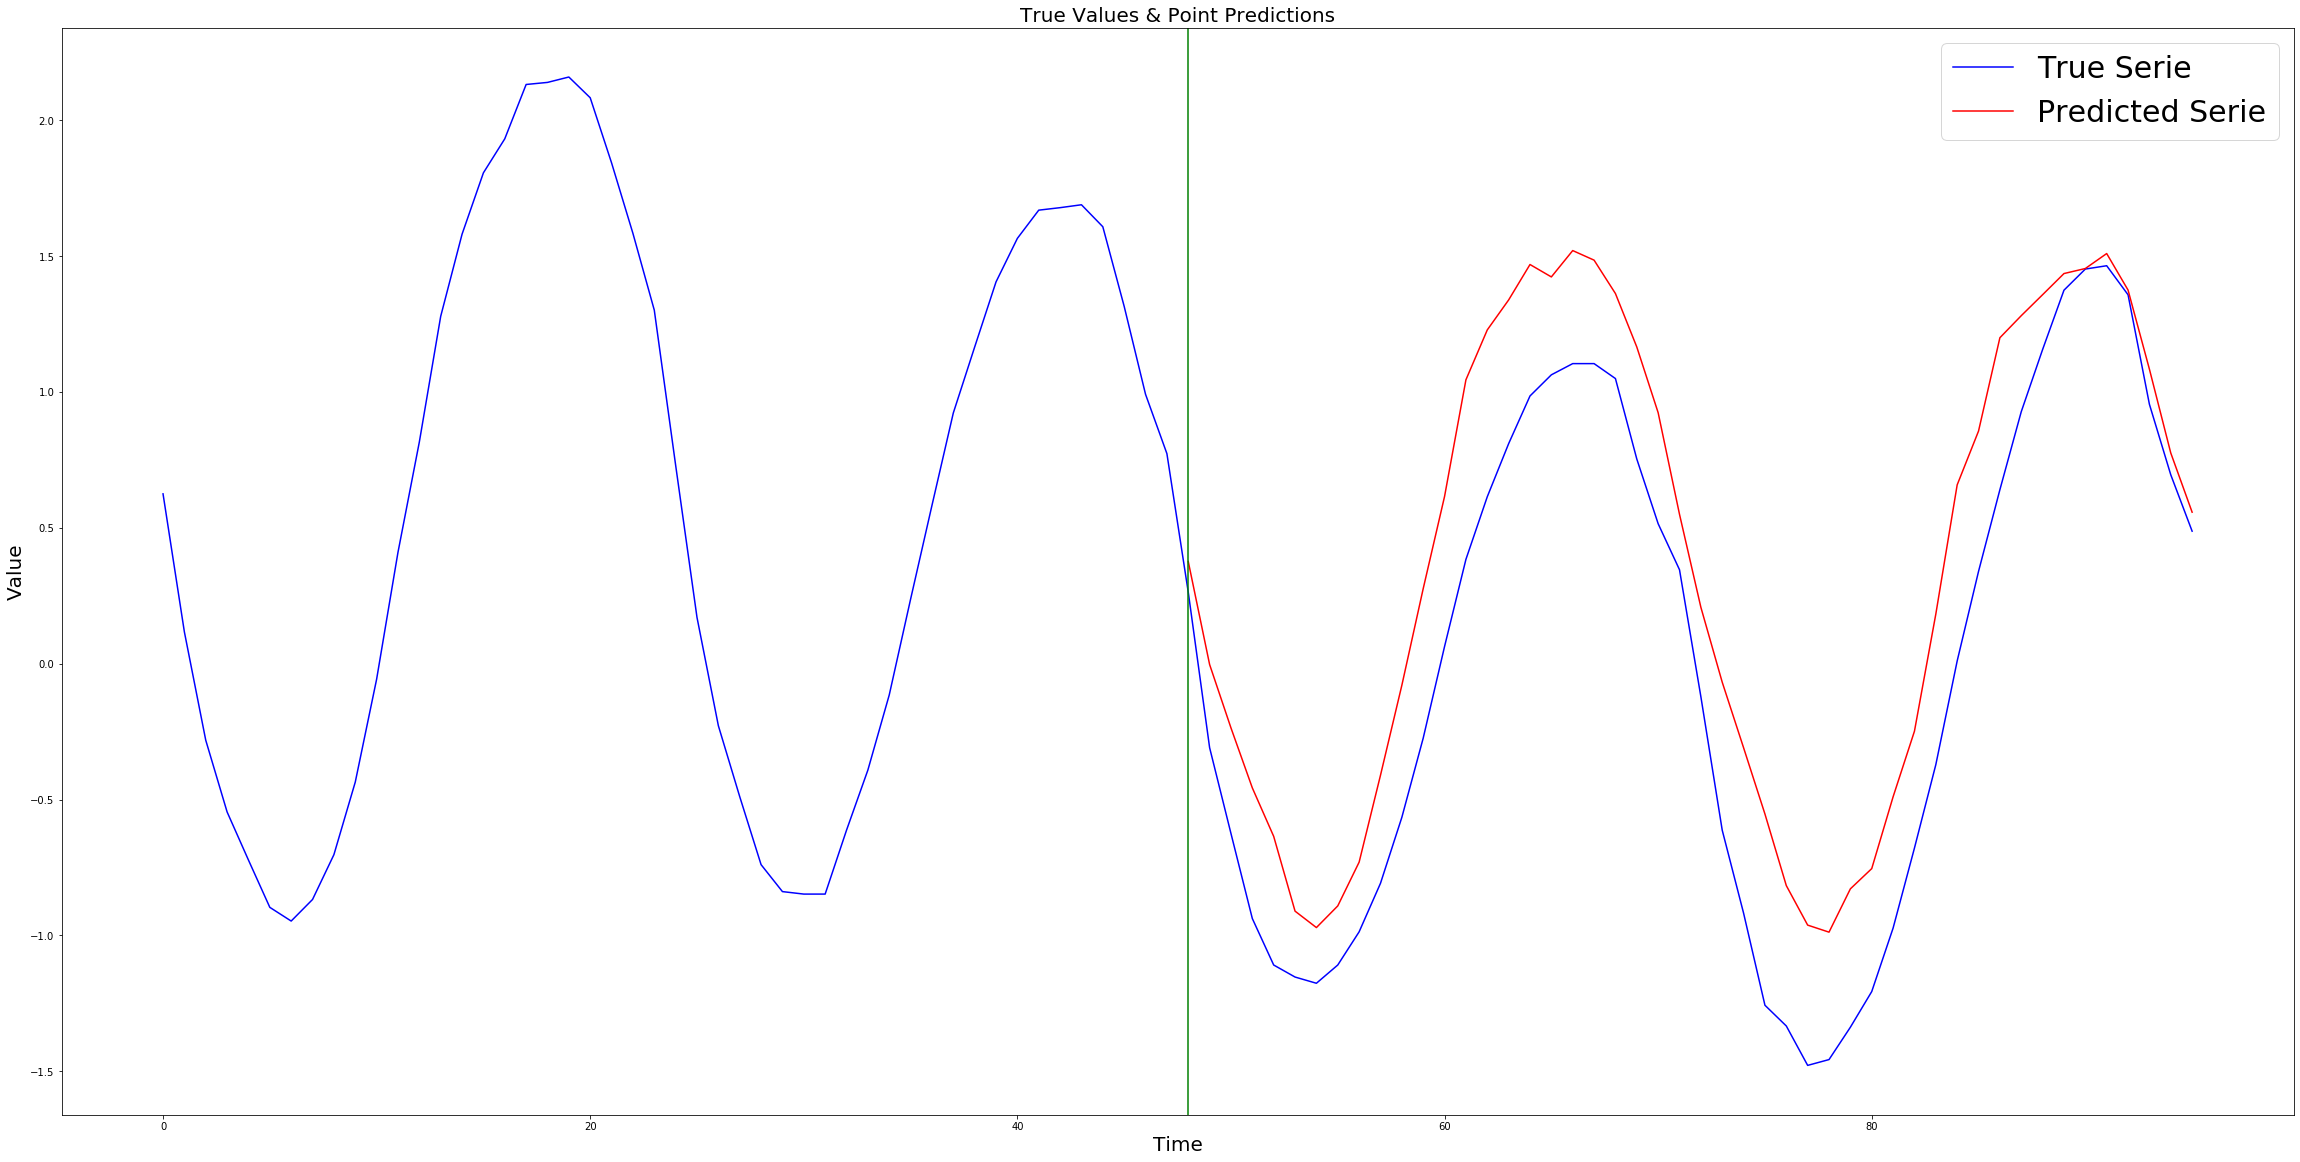

In [28]:
IDX = 1
#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))
#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=IDX)

# Evaluate A Model Against An Error Function

In [27]:
model = M4Model(batch_size=BATCH_SIZE)
model.load('../models/11/architecture.json','../models/11/weights.h5')

train_error = evaluate_model(model, train_x, train_y, smape)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smape)
print(test_error)

validate_error = evaluate_model(model, validate_x, validate_y, smape)
print(validate_error)

Loaded model from disk
[[ 0.24194634  0.00331721 -0.03904115 ...  0.8749988   0.82251855
   0.87064356]
 [ 0.20855939  0.02134628 -0.10379037 ...  0.87184249  0.92155622
   0.9416883 ]
 [ 1.99128819  1.84242579  1.66017171 ...  1.21667912  1.21740955
   1.30540649]
 ...
 [ 1.58853911  1.42202489  1.23591991 ...  1.21894743  1.31612883
   1.44693809]
 [ 1.74616656  1.53235082  1.33804248 ...  1.31178855  1.38279393
   1.51970286]
 [ 0.21463653  0.08941586 -0.04042575 ...  0.93944101  0.93708853
   0.89125748]]
[[-0.51615027 -0.64130866 -0.66726007 ...  0.32336912  0.09863663
  -0.07130774]
 [ 0.78466932  0.53025262  0.37123984 ...  1.08531413  1.09689475
   0.89527607]
 [ 1.70295432  1.41737986  1.23334314 ...  1.40325641  1.46949202
   1.6335951 ]
 ...
 [ 0.60898621  0.93649359  0.89257271 ... -0.08627589  0.11549319
   0.9662196 ]
 [-0.30186186 -0.47582162 -0.51674195 ...  0.80513015  0.6282509
   0.40632785]
 [ 0.43753046  0.29294403  0.14033279 ...  1.23003716  1.17841772
   0.98829

[[1.23400996 1.01235306 0.87624506 ... 1.22856712 1.20243469 1.2704424 ]
 [0.72381398 0.72185927 0.64840383 ... 0.73527251 0.77476189 0.98260522]
 [0.95297358 0.70018094 0.55269978 ... 1.10285514 1.13933058 0.97495511]
 ...
 [1.32040321 0.9739003  0.64580154 ... 1.41181294 1.37080161 1.44234034]
 [0.83112316 0.67776934 0.53687294 ... 1.14966876 1.09247292 0.98853109]
 [0.67234185 0.6576239  0.57327247 ... 0.81498499 0.72721638 0.79925918]]
[[ 1.26443111  1.23154772  1.21551516 ...  0.77186663  0.95303323
   1.05131643]
 [ 0.94667782  0.73232327  0.57375026 ...  1.30154206  1.26293759
   1.19282404]
 [ 0.69014386  0.52218428  0.38366879 ...  1.23790142  1.18995204
   1.10809892]
 ...
 [-0.76899178 -0.76344085 -0.44996156 ... -0.99302015 -0.99708228
  -0.82002677]
 [-0.93254514 -0.9016589  -0.57076326 ... -1.07853294 -1.09556175
  -0.93606669]
 [-0.555116   -0.7876304  -0.94332149 ...  0.32037854 -0.07504242
  -0.40642385]]
[[-0.95117101 -0.97969818 -1.02192286 ... -0.52247708 -0.7507937

[[-1.08938321 -1.13661047 -1.18287625 ... -0.55262022 -0.73485443
  -0.86598474]
 [-1.0351045  -1.05449342 -1.09928526 ... -0.61435982 -0.687703
  -0.79107139]
 [-0.25210437 -0.46746522 -0.6861629  ... -0.08153591 -0.21806374
  -0.25261171]
 ...
 [ 1.23863979  1.0462615   0.91582469 ...  1.22908716  1.21559175
   1.28756384]
 [ 1.10754374  0.90471929  0.76153918 ...  1.2616907   1.19130173
   1.20340676]
 [ 0.72168642  0.39803142  0.18815609 ...  1.14330262  0.95667121
   0.74131225]]
[[0.71481332 0.58091341 0.52726076 ... 1.11978082 1.06090079 1.26221289]
 [1.03876244 0.92945513 0.85126008 ... 0.89035965 0.94688753 1.11985023]
 [1.00931494 0.74296683 0.60000445 ... 1.20854202 1.16599519 1.01501556]
 ...
 [0.87566471 0.87717449 0.90597374 ... 0.9820802  0.95073841 1.17955978]
 [0.54336231 0.5385739  0.43939929 ... 0.71430134 0.68062255 0.63064719]
 [1.81251053 1.47959289 1.34510634 ... 1.27496703 1.28156027 1.38698385]]
[[ 1.17708307  0.76574666  0.41926827 ...  1.41765566  1.2129262
 

[[-0.8519119  -0.98312215 -1.11470503 ... -0.19327472 -0.45284502
  -0.60369617]
 [-0.80222094 -0.93505313 -1.05900292 ... -0.20284376 -0.43711601
  -0.57417626]
 [-0.74964098 -0.89998071 -1.01791314 ... -0.11204455 -0.37405399
  -0.52934964]
 ...
 [-0.71495279 -0.80835461 -0.91406585 ... -0.14919178 -0.38824636
  -0.52033623]
 [-0.77398477 -0.92953775 -1.04386424 ... -0.10427496 -0.39340641
  -0.59427596]
 [-0.96618105 -1.0605437  -1.10912881 ... -0.29048367 -0.61809491
  -0.78277567]]
[[-0.59597992 -1.07207501 -1.24931447 ...  0.25182064 -0.21586465
  -0.58793959]
 [-1.02784126 -1.12380537 -1.15291007 ... -0.57591729 -0.70991959
  -0.80628942]
 [-0.20376785 -0.74094801 -0.92971257 ...  0.99863287  0.33855151
  -0.18671331]
 ...
 [ 1.2315489   1.00198897  0.86432136 ...  1.31162763  1.32500037
   1.31125357]
 [ 1.76069724  1.64211306  1.46858148 ...  1.11640031  1.17547798
   1.20205363]
 [ 1.23983661  1.1649566   0.98745106 ...  0.83261643  1.04840764
   1.14952071]]
[[ 2.28276208  2

[[ 0.55704469  0.49111865  0.37957566 ...  0.96776702  0.97240679
   1.13419657]
 [ 0.9237704   0.79832394  0.6269549  ...  0.90700148  1.07018277
   1.12725807]
 [ 0.72402475  0.74676356  0.5506134  ...  0.8273498   0.89401482
   0.99938256]
 ...
 [-1.14362942 -1.16355587 -1.23276626 ... -0.5186133  -0.78636746
  -0.8930852 ]
 [-0.81220601 -0.84035197 -0.89974422 ... -0.44070067 -0.62057593
  -0.67756607]
 [-0.79505479 -0.76746414 -0.45442317 ... -0.96107402 -0.95882943
  -0.79514047]]
[[-0.91552514 -0.90147769 -0.63691899 ... -0.99977211 -1.05249966
  -0.92482356]
 [-1.0523729  -1.10673705 -1.19271629 ... -0.40939077 -0.68219746
  -0.81926337]
 [-0.88158296 -0.90634779 -0.95584703 ... -0.49093047 -0.68272535
  -0.75391413]
 ...
 [-0.72077299 -0.8454851  -0.96765147 ... -0.03614493 -0.32505148
  -0.48762175]
 [-0.82151208 -0.89703644 -0.99641455 ... -0.25368907 -0.49188682
  -0.60719498]
 [-0.59365105 -0.7145444  -0.82454338 ...  0.0543468  -0.22385585
  -0.37052853]]
[[-0.66012346 -0

[[-0.31918832 -0.4721121  -0.61349757 ...  0.39659388  0.08804553
  -0.09596772]
 [-0.59942825 -0.74421585 -0.8773191  ... -0.14217783 -0.33463489
  -0.45798416]
 [-0.66385774 -0.78776959 -0.89727105 ... -0.24976546 -0.43831123
  -0.54660622]
 ...
 [-0.21987785 -0.46342444 -0.68277138 ...  0.61998223  0.27650504
   0.02087999]
 [-0.87174179 -0.9727976  -1.06793671 ... -0.48418517 -0.6750563
  -0.75574235]
 [-0.62975112 -0.76929704 -0.90848595 ...  0.14416672 -0.20003288
  -0.39448037]]
[[-0.27854128 -0.41722184 -0.53973804 ...  0.3812414   0.09397236
  -0.07340799]
 [-0.42636013 -0.56819143 -0.68806712 ...  0.30470639 -0.02339979
  -0.21170771]
 [ 0.75936481  0.38025206  0.14017504 ...  1.26236748  1.04581799
   0.84255443]
 ...
 [-0.69167901 -0.89232035 -1.04094361 ...  0.05419778 -0.29481532
  -0.47254226]
 [-1.01727656 -1.05406178 -1.06736947 ... -0.59909858 -0.7359946
  -0.8520448 ]
 [-0.78635382 -1.1895765  -1.32170539 ...  0.47599752 -0.25834157
  -0.73662568]]
[[-1.02912617e+00 

[[-0.70761086 -0.87618254 -0.87962603 ... -0.21092081 -0.35990778
  -0.51812874]
 [-0.97293167 -1.12526601 -1.19170689 ... -0.32790326 -0.64195134
  -0.76094116]
 [-0.60022315 -0.79334708 -0.84343115 ... -0.29669632 -0.61239362
  -0.73839795]
 ...
 [-0.07622819 -0.19503734 -0.24358928 ...  0.76987044  0.60133067
   0.35633682]
 [ 0.47422926  0.31508473  0.17272409 ...  0.98248536  0.96405696
   0.65974139]
 [ 1.81249295  1.5980036   1.41932269 ...  1.3518415   1.35124024
   1.4728832 ]]
44.27578182598091
[[-0.02325886 -0.31247611 -0.54287116 ...  0.80365337  0.46115753
   0.17334537]
 [ 0.3759962  -0.00315951 -0.23634832 ...  1.08368546  0.77525965
   0.55739825]
 [ 0.52625543  0.20120057  0.01764845 ...  1.21853571  0.9163183
   0.66342565]
 ...
 [ 0.6411351   0.47560447  0.3688104  ...  1.27687467  1.1612109
   0.96787814]
 [ 0.53957055  0.34621911  0.25319867 ...  1.14039524  0.98863957
   0.72042764]
 [ 0.42107105  0.04266925 -0.18102897 ...  1.1167139   0.79757037
   0.55977332]]
